In [1]:
import xlrd
from collections import Counter
from nltk import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
stopwords = nltk.corpus.stopwords.words('english')
stopwordss = [line.strip() for line in open('/content/drive/My Drive/dataset/Stop_words.txt',encoding = 'UTF-8').readlines()]

In [3]:
from tqdm import tqdm
wordbag = []
Years1 = [2005,2006,2007,2008,2009,2010,2011,2012]
Years2 = [2013,2014,2015,2016,2017,2018,2019,2020]
for year in tqdm(Years1):
  rd = xlrd.open_workbook('/content/drive/My Drive/dataset/' + str(year) + '.xlsx')
  table = rd.sheets()[0]
  ncols = table.ncols
  Contents = table.col(1, start_rowx=1, end_rowx=None)
  # print(len(Contents))
  for content in Contents:
    token_words = word_tokenize(content.value)
    for word in token_words:
      if word.lower() not in stopwords and word.lower() not in stopwordss:
        wordbag.append(word)

print(len(wordbag))

100%|██████████| 8/8 [02:01<00:00, 14.53s/it]

2533


In [0]:
for i in range(len(wordbag)):
  if wordbag[i] == 'U.S.' or wordbag[i] == 'u.s.':
    wordbag[i] = 'US'

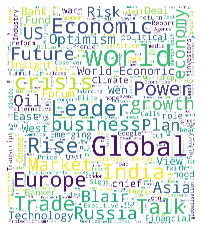

In [6]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt 
cloud_string = ''
for i in wordbag:
	cloud_string += i + ' '
###############################词云制作###############################
# image = imread('davos.png')
# image_colors = ImageColorGenerator(image)# 基于背景颜色设置字体色彩
wc=WordCloud(width=1300, height=1500, #画布长、宽，默认（400,200）像素
            margin=1,    #字与字之间的距离
            background_color='white',#背景颜色
            min_font_size=10,max_font_size=200,#显示的最小,最大的字体大小
            max_words=300,#显示的词的最大个数
            ranks_only=None,#是否只是排名
            prefer_horizontal=.95,#词语水平方向排版出现的频率0.9（所以词语垂直方向排版出现频率为 0.1 ）
            # mask=image,## 以该参数值作图绘制词云，这个参数不为空时，width和height会被忽略
            scale=10, #按照比例进行放大画布
            color_func=None,#生成新颜色的函数，如果为空，则使用 self.color_func
            stopwords=('China','Davos','Chinese'),#设置需要屏蔽的词，如果为空，则使用内置的STOPWORDS
            random_state=None, # 为每个词返回一个PIL颜色
            font_step=1, #字体步长，如果步长大于1，会加快运算但是可能导致结果出现较大的误差。
            mode="RGBA",#当参数为“RGBA”并且background_color不为空时，背景为透明
            relative_scaling=0.5, #词频和字体大小的关联性
            regexp=None,#使用正则表达式分隔输入的文本
            collocations=True,#是否包括两个词的搭配
            colormap=None,#给每个单词随机分配颜色
            normalize_plurals=True,#是否删除词的尾随S之类的
            # font_path="/Users/scy/Desktop/Python/自然语言处理/产品/HUAWENZHONGSONG.ttf"  #字体路径
            )
wc.generate(cloud_string)
plt.imshow(wc)#显示词云图
plt.axis("off")#关闭坐标轴
plt.show()#显示窗口
wc.to_file('year1.png')# 保存图片